# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier as KNN

# Import Dataset

In [3]:
loan = pd.read_csv('kiva_loans_standardized.csv')

# Test By Label

Because different labels has different landscape, it is the best to test different model for different lables.  

## Bullet

In [39]:
selected_features = list(loan.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_bullet')

In [40]:
y = loan['repayment_interval_bullet']
X = loan[selected_features]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

In [7]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [42]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.transform(X_test)

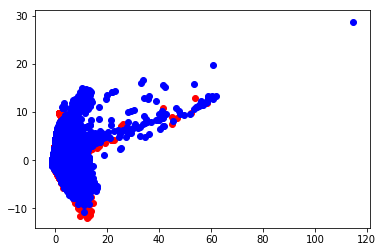

In [43]:
coord_X_0 = []
coord_Y_0 = []
coord_X_1 = []
coord_Y_1 = []
i = 0
# for i in range(len(y_train)):
for each in y_train:
#     print(y_train[i])
#     print(each)
#     if y_train[i] == 1:
    if each == 1:
        coord_X_0.append(X_train_pca[i][0])
        coord_Y_0.append(X_train_pca[i][1])
    else:
        coord_X_1.append(X_train_pca[i][0])
        coord_Y_1.append(X_train_pca[i][1])
    i += 1
plt.scatter(coord_X_0, coord_Y_0, color="red")
plt.scatter(coord_X_1, coord_Y_1, color="blue")
plt.show()
# print(coord_X_0)

### Logistic Regression

In [92]:
lg = LogisticRegression()
lg.fit(X_train_pca,y_train)
y_pred = lg.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     30096
           1       0.36      0.00      0.00      3465

   micro avg       0.90      0.90      0.90     33561
   macro avg       0.63      0.50      0.47     33561
weighted avg       0.84      0.90      0.85     33561

[[30089     7]
 [ 3461     4]]


In [93]:
lg = LogisticRegression()
lg.fit(X_train_lda,y_train)
y_pred = lg.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     30096
           1       0.73      0.62      0.67      3465

   micro avg       0.94      0.94      0.94     33561
   macro avg       0.85      0.80      0.82     33561
weighted avg       0.93      0.94      0.94     33561

[[29319   777]
 [ 1310  2155]]


### Decision Tree

In [97]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)
y_pred = dtree.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     30096
           1       0.51      0.51      0.51      3465

   micro avg       0.90      0.90      0.90     33561
   macro avg       0.73      0.73      0.73     33561
weighted avg       0.90      0.90      0.90     33561

[[28387  1709]
 [ 1708  1757]]


In [96]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train_lda, y_train)
y_pred = dtree.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     30096
           1       0.70      0.70      0.70      3465

   micro avg       0.94      0.94      0.94     33561
   macro avg       0.83      0.83      0.83     33561
weighted avg       0.94      0.94      0.94     33561

[[29069  1027]
 [ 1038  2427]]


### Random Forest

In [103]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4)
forest.fit(X_train_pca, y_train)
y_pred = forest.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     30096
           1       0.80      0.15      0.25      3465

   micro avg       0.91      0.91      0.91     33561
   macro avg       0.85      0.57      0.60     33561
weighted avg       0.90      0.91      0.88     33561

[[29965   131]
 [ 2950   515]]


In [102]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4)
forest.fit(X_train_lda, y_train)
y_pred = forest.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     30096
           1       0.74      0.72      0.73      3465

   micro avg       0.95      0.95      0.95     33561
   macro avg       0.86      0.85      0.85     33561
weighted avg       0.94      0.95      0.95     33561

[[29229   867]
 [  963  2502]]


### K Nearest Neighbour

In [26]:
knn = KNN(n_neighbors=100)
knn.fit(X_train_pca,y_train)
y_pred = knn.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     30096
           1       0.76      0.27      0.40      3465

   micro avg       0.92      0.92      0.92     33561
   macro avg       0.84      0.63      0.68     33561
weighted avg       0.91      0.92      0.90     33561

[[29803   293]
 [ 2528   937]]


In [23]:
knn = KNN(n_neighbors=100)
knn.fit(X_train_lda,y_train)
y_pred = knn.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     30096
           1       0.76      0.71      0.73      3465

   micro avg       0.95      0.95      0.95     33561
   macro avg       0.86      0.84      0.85     33561
weighted avg       0.95      0.95      0.95     33561

[[29332   764]
 [ 1022  2443]]


### Support Vector Machine

In [40]:
# Load too long for SVM! only choose some of the sample to train.  
clf = SVC()
clf.fit(X_train_lda[0:37644], y_train[0:37644])
y_pred = clf.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.96      0.97     30096
           1       0.69      0.77      0.73      3465

   micro avg       0.94      0.94      0.94     33561
   macro avg       0.83      0.86      0.85     33561
weighted avg       0.94      0.94      0.94     33561

[[28928  1168]
 [  808  2657]]


### Summary

Using LDA feature extraction, it is trivial that all prediction methods can come up to 94% precision, F1 score, recall and support.  

However, if it is 95% precision, then only KNN can do it.  

## Weekly

In [34]:
selected_features = list(loan.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_bullet')

In [35]:
y = loan['repayment_interval_weekly']
X = loan[selected_features]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

In [44]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [37]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.transform(X_test)

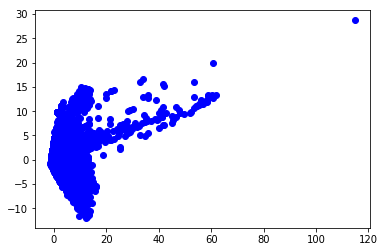

In [38]:
coord_X_0 = []
coord_Y_0 = []
coord_X_1 = []
coord_Y_1 = []
i = 0
# for i in range(len(y_train)):
for each in y_train:
#     print(y_train[i])
#     print(each)
#     if y_train[i] == 1:
    if each == 1:
        coord_X_0.append(X_train_pca[i][0])
        coord_Y_0.append(X_train_pca[i][1])
    else:
        coord_X_1.append(X_train_pca[i][0])
        coord_Y_1.append(X_train_pca[i][1])
    i += 1
plt.scatter(coord_X_0, coord_Y_0, color="red")
plt.scatter(coord_X_1, coord_Y_1, color="blue")
plt.show()
# print(coord_X_0)

### Logistic Regression

In [46]:
lg = LogisticRegression()
lg.fit(X_train_pca,y_train)
y_pred = lg.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33531
           1       0.00      0.00      0.00        30

   micro avg       1.00      1.00      1.00     33561
   macro avg       0.50      0.50      0.50     33561
weighted avg       1.00      1.00      1.00     33561

[[33531     0]
 [   30     0]]


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
lg = LogisticRegression()
lg.fit(X_train_lda,y_train)
y_pred = lg.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33531
           1       0.00      0.00      0.00        30

   micro avg       1.00      1.00      1.00     33561
   macro avg       0.50      0.50      0.50     33561
weighted avg       1.00      1.00      1.00     33561

[[33531     0]
 [   30     0]]


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision Tree

In [48]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)
y_pred = dtree.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33531
           1       0.37      0.53      0.44        30

   micro avg       1.00      1.00      1.00     33561
   macro avg       0.69      0.77      0.72     33561
weighted avg       1.00      1.00      1.00     33561

[[33504    27]
 [   14    16]]


In [49]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train_lda, y_train)
y_pred = dtree.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33531
           1       0.38      0.50      0.43        30

   micro avg       1.00      1.00      1.00     33561
   macro avg       0.69      0.75      0.72     33561
weighted avg       1.00      1.00      1.00     33561

[[33507    24]
 [   15    15]]


### Random Forest

In [51]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4)
forest.fit(X_train_pca, y_train)
y_pred = forest.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33531
           1       0.00      0.00      0.00        30

   micro avg       1.00      1.00      1.00     33561
   macro avg       0.50      0.50      0.50     33561
weighted avg       1.00      1.00      1.00     33561

[[33531     0]
 [   30     0]]


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4)
forest.fit(X_train_lda, y_train)
y_pred = forest.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33531
           1       0.00      0.00      0.00        30

   micro avg       1.00      1.00      1.00     33561
   macro avg       0.50      0.50      0.50     33561
weighted avg       1.00      1.00      1.00     33561

[[33531     0]
 [   30     0]]


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### K Nearest Neighbour

In [53]:
knn = KNN(n_neighbors=100)
knn.fit(X_train_pca,y_train)
y_pred = knn.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33531
           1       0.30      0.10      0.15        30

   micro avg       1.00      1.00      1.00     33561
   macro avg       0.65      0.55      0.57     33561
weighted avg       1.00      1.00      1.00     33561

[[33524     7]
 [   27     3]]


In [52]:
knn = KNN(n_neighbors=100)
knn.fit(X_train_lda,y_train)
y_pred = knn.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33531
           1       0.00      0.00      0.00        30

   micro avg       1.00      1.00      1.00     33561
   macro avg       0.50      0.50      0.50     33561
weighted avg       1.00      1.00      1.00     33561

[[33531     0]
 [   30     0]]


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Support Vector Machine

In [56]:
# Load too long for SVM! only choose some of the sample to train.  
clf = SVC()
clf.fit(X_train_pca[0:137644], y_train[0:137644])
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33531
           1       0.00      0.00      0.00        30

   micro avg       1.00      1.00      1.00     33561
   macro avg       0.50      0.50      0.50     33561
weighted avg       1.00      1.00      1.00     33561

[[33531     0]
 [   30     0]]


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
# Load too long for SVM! only choose some of the sample to train.  
clf = SVC()
clf.fit(X_train_lda[0:137644], y_train[0:137644])
y_pred = clf.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33531
           1       0.00      0.00      0.00        30

   micro avg       1.00      1.00      1.00     33561
   macro avg       0.50      0.50      0.50     33561
weighted avg       1.00      1.00      1.00     33561

[[33531     0]
 [   30     0]]


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Summary

Among all these models, only KNN and decision tree can predict something.  

In comparison, decision tree does suprisingly well; it can recognize half of the cases.  

Also, the PCA's dataset does better than LDA's in both KNN and decision tree.  

## Monthly

In [28]:
selected_features = list(loan.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_bullet')

In [29]:
y = loan['repayment_interval_monthly']
X = loan[selected_features]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

In [31]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [32]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.transform(X_test)

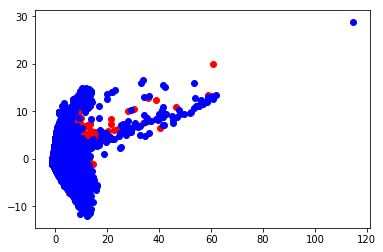

In [33]:
coord_X_0 = []
coord_Y_0 = []
coord_X_1 = []
coord_Y_1 = []
i = 0
# for i in range(len(y_train)):
for each in y_train:
#     print(y_train[i])
#     print(each)
#     if y_train[i] == 1:
    if each == 1:
        coord_X_0.append(X_train_pca[i][0])
        coord_Y_0.append(X_train_pca[i][1])
    else:
        coord_X_1.append(X_train_pca[i][0])
        coord_Y_1.append(X_train_pca[i][1])
    i += 1
plt.scatter(coord_X_0, coord_Y_0, color="red")
plt.scatter(coord_X_1, coord_Y_1, color="blue")
plt.show()
# print(coord_X_0)

### Logistic Regression

In [63]:
lg = LogisticRegression()
lg.fit(X_train_pca,y_train)
y_pred = lg.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.68      0.75      0.72     16454
           1       0.74      0.67      0.70     17107

   micro avg       0.71      0.71      0.71     33561
   macro avg       0.71      0.71      0.71     33561
weighted avg       0.71      0.71      0.71     33561

[[12408  4046]
 [ 5707 11400]]


In [64]:
lg = LogisticRegression()
lg.fit(X_train_lda,y_train)
y_pred = lg.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.83      0.77      0.80     16454
           1       0.79      0.85      0.82     17107

   micro avg       0.81      0.81      0.81     33561
   macro avg       0.81      0.81      0.81     33561
weighted avg       0.81      0.81      0.81     33561

[[12624  3830]
 [ 2586 14521]]


### Decision Tree

In [65]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)
y_pred = dtree.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     16454
           1       0.80      0.78      0.79     17107

   micro avg       0.78      0.78      0.78     33561
   macro avg       0.78      0.78      0.78     33561
weighted avg       0.78      0.78      0.78     33561

[[13027  3427]
 [ 3800 13307]]


In [66]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train_lda, y_train)
y_pred = dtree.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     16454
           1       0.83      0.81      0.82     17107

   micro avg       0.82      0.82      0.82     33561
   macro avg       0.82      0.82      0.82     33561
weighted avg       0.82      0.82      0.82     33561

[[13571  2883]
 [ 3303 13804]]


### Random Forest

In [68]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4)
forest.fit(X_train_pca, y_train)
y_pred = forest.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     16454
           1       0.72      0.77      0.75     17107

   micro avg       0.73      0.73      0.73     33561
   macro avg       0.73      0.73      0.73     33561
weighted avg       0.73      0.73      0.73     33561

[[11377  5077]
 [ 3860 13247]]


In [67]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4)
forest.fit(X_train_lda, y_train)
y_pred = forest.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     16454
           1       0.85      0.79      0.82     17107

   micro avg       0.82      0.82      0.82     33561
   macro avg       0.82      0.82      0.82     33561
weighted avg       0.82      0.82      0.82     33561

[[14083  2371]
 [ 3676 13431]]


### K Nearest Neighbour

In [70]:
knn = KNN(n_neighbors=100)
knn.fit(X_train_pca,y_train)
y_pred = knn.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     16454
           1       0.77      0.79      0.78     17107

   micro avg       0.77      0.77      0.77     33561
   macro avg       0.77      0.77      0.77     33561
weighted avg       0.77      0.77      0.77     33561

[[12369  4085]
 [ 3527 13580]]


In [69]:
knn = KNN(n_neighbors=100)
knn.fit(X_train_lda,y_train)
y_pred = knn.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     16454
           1       0.83      0.82      0.83     17107

   micro avg       0.82      0.82      0.82     33561
   macro avg       0.82      0.82      0.82     33561
weighted avg       0.82      0.82      0.82     33561

[[13546  2908]
 [ 3020 14087]]


### Support Vector Machine

In [10]:
# Load too long for SVM! only choose some of the sample to train.  
clf = SVC()
clf.fit(X_train_pca[0:37644], y_train[0:37644])
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.74      0.71      0.73     16454
           1       0.73      0.76      0.75     17107

   micro avg       0.74      0.74      0.74     33561
   macro avg       0.74      0.74      0.74     33561
weighted avg       0.74      0.74      0.74     33561

[[11693  4761]
 [ 4068 13039]]


In [9]:
# Load too long for SVM! only choose some of the sample to train.  
clf = SVC()
clf.fit(X_train_lda[0:37644], y_train[0:37644])
y_pred = clf.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.82      0.79      0.81     16454
           1       0.81      0.83      0.82     17107

   micro avg       0.81      0.81      0.81     33561
   macro avg       0.81      0.81      0.81     33561
weighted avg       0.81      0.81      0.81     33561

[[13044  3410]
 [ 2858 14249]]


### Summary

No models has precision, recall, f1-score or support above 82%.  

Need much more efford to have accurate prediction.  

## Irregular

In [11]:
selected_features = list(loan.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_bullet')

In [12]:
y = loan['repayment_interval_irregular']
X = loan[selected_features]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

In [14]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [15]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.transform(X_test)

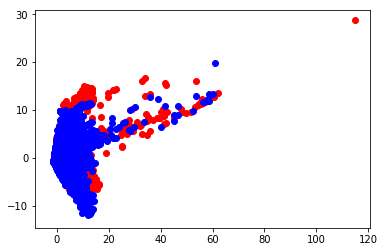

In [27]:
coord_X_0 = []
coord_Y_0 = []
coord_X_1 = []
coord_Y_1 = []
i = 0
# for i in range(len(y_train)):
for each in y_train:
#     print(y_train[i])
#     print(each)
#     if y_train[i] == 1:
    if each == 1:
        coord_X_0.append(X_train_pca[i][0])
        coord_Y_0.append(X_train_pca[i][1])
    else:
        coord_X_1.append(X_train_pca[i][0])
        coord_Y_1.append(X_train_pca[i][1])
    i += 1
plt.scatter(coord_X_0, coord_Y_0, color="red")
plt.scatter(coord_X_1, coord_Y_1, color="blue")
plt.show()
# print(coord_X_0)

### Logistic Regression

In [16]:
lg = LogisticRegression()
lg.fit(X_train_pca,y_train)
y_pred = lg.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.73      0.85      0.79     20602
           1       0.68      0.51      0.58     12959

   micro avg       0.72      0.72      0.72     33561
   macro avg       0.71      0.68      0.69     33561
weighted avg       0.71      0.72      0.71     33561

[[17524  3078]
 [ 6336  6623]]


In [17]:
lg = LogisticRegression()
lg.fit(X_train_lda,y_train)
y_pred = lg.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.85      0.93      0.89     20602
           1       0.86      0.74      0.80     12959

   micro avg       0.86      0.86      0.86     33561
   macro avg       0.86      0.84      0.84     33561
weighted avg       0.86      0.86      0.85     33561

[[19096  1506]
 [ 3323  9636]]


### Decision Tree

In [18]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)
y_pred = dtree.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     20602
           1       0.76      0.77      0.77     12959

   micro avg       0.82      0.82      0.82     33561
   macro avg       0.81      0.81      0.81     33561
weighted avg       0.82      0.82      0.82     33561

[[17507  3095]
 [ 2938 10021]]


In [19]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train_lda, y_train)
y_pred = dtree.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     20602
           1       0.81      0.81      0.81     12959

   micro avg       0.85      0.85      0.85     33561
   macro avg       0.84      0.84      0.84     33561
weighted avg       0.85      0.85      0.85     33561

[[18088  2514]
 [ 2523 10436]]


### Random Forest

In [20]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4)
forest.fit(X_train_pca, y_train)
y_pred = forest.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83     20602
           1       0.75      0.64      0.69     12959

   micro avg       0.78      0.78      0.78     33561
   macro avg       0.77      0.75      0.76     33561
weighted avg       0.78      0.78      0.77     33561

[[17803  2799]
 [ 4653  8306]]


In [21]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4)
forest.fit(X_train_lda, y_train)
y_pred = forest.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     20602
           1       0.82      0.83      0.82     12959

   micro avg       0.86      0.86      0.86     33561
   macro avg       0.85      0.86      0.86     33561
weighted avg       0.86      0.86      0.86     33561

[[18160  2442]
 [ 2183 10776]]


### K Nearest Neighbour

In [22]:
knn = KNN(n_neighbors=100)
knn.fit(X_train_pca,y_train)
y_pred = knn.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85     20602
           1       0.78      0.71      0.74     12959

   micro avg       0.81      0.81      0.81     33561
   macro avg       0.80      0.79      0.79     33561
weighted avg       0.81      0.81      0.81     33561

[[17987  2615]
 [ 3818  9141]]


In [23]:
knn = KNN(n_neighbors=100)
knn.fit(X_train_lda,y_train)
y_pred = knn.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     20602
           1       0.84      0.80      0.82     12959

   micro avg       0.86      0.86      0.86     33561
   macro avg       0.86      0.85      0.86     33561
weighted avg       0.86      0.86      0.86     33561

[[18673  1929]
 [ 2633 10326]]


### Support Vector Machine

In [25]:
# Load too long for SVM! only choose some of the sample to train.  
clf = SVC()
clf.fit(X_train_pca[0:37644], y_train[0:37644])
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.80      0.85      0.82     20602
           1       0.74      0.65      0.69     12959

   micro avg       0.77      0.77      0.77     33561
   macro avg       0.77      0.75      0.76     33561
weighted avg       0.77      0.77      0.77     33561

[[17558  3044]
 [ 4509  8450]]


In [26]:
# Load too long for SVM! only choose some of the sample to train.  
clf = SVC()
clf.fit(X_train_lda[0:37644], y_train[0:37644])
y_pred = clf.predict(X_test_lda)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.91      0.89     20602
           1       0.85      0.77      0.81     12959

   micro avg       0.86      0.86      0.86     33561
   macro avg       0.86      0.84      0.85     33561
weighted avg       0.86      0.86      0.86     33561

[[18804  1798]
 [ 2931 10028]]


### Summary

All models performs 86% accuracy in the four indices. 

However, no model have more than 86% accuracy.  

# Conclusion

Overall, the difficulty of prediction is:

1. Weekly (Possible reasobn: too little samples)
2. Monthly
3. Irregular
4. Bullet

Decision Tree and KNN performs the best in average.  However, Decision Tree particularlly outperforms KNN in Weekly.  This infers Decision Tree is most suitable for this dataset.  

Another importance of this paper is it suggests that LDA is better than PCA in nearly all cases.  Fine tuning of parameter may yield other discovery, but in general we should choose LDA for feature extraction.  

Lastly, from the experiments, the prediction is in-between linear relationship and non-linear relation.  Although all models perform the same in general case, it is only the decision tree and KNN have the best result in special cases.  Flexible models are suggested for futher work.  